In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import qcodes as qc
import matplotlib.colors as colors
import qcodes.instrument_drivers.nplab_drivers as npd
from matplotlib.colors import SymLogNorm, LogNorm, DivergingNorm
from os import path
import colorcet as cc

In [2]:
from scipy.interpolate import RectBivariateSpline
from scipy.ndimage import gaussian_filter

In [3]:
import qcodes.instrument_drivers.nplab_drivers as npd
from scipy.signal import find_peaks

In [4]:
cd ..

/Users/robertpolski/Documents/NPGroupResearch/Measurements/Triton/qcodes_data


In [5]:
qc.DataSet.default_io.base_location = path.abspath('.')

In [6]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg'  # with this, we need to raster the pcolormesh images with rasterized=True
# and save with .svg in the filename. don't worry. The annoying white line/offset in the image doesn't seem to show up if you use dpi=something while saving

In [7]:
# plt.rcParams['font.sans-serif'] = ['Arial',  # make Arial the standard font
#  'DejaVu Sans',
#  'Bitstream Vera Sans',
#  'Computer Modern Sans Serif',
#  'Lucida Grande',
#  'Verdana',
#  'Geneva',
#  'Lucid',
#  'Helvetica',
#  'Avant Garde',
#  'sans-serif']

# plt.rcParams['font.size'] = 12

font = {
                'family': 'Arial',
                'size': 12,
                'serif': 'Times',
                'sans-serif': 'Arial'
            }

plt.rc('font', **font)

In [8]:
figfile = path.abspath('.') + '/Figures/200901_S3_graphs/'

In [9]:
%matplotlib widget

# S3 gate curve of different contacts

In [10]:
data_gate1 = qc.load_data('data/2020-09-02/#005_S3_38-39_865_baseT_1nA_12-03-36')
data_gate2 = qc.load_data('data/2020-09-02/#006_S3_39-40_865_baseT_1nA_12-14-09')
data_gate3 = qc.load_data('data/2020-09-02/#007_S3_40-41_865_baseT_1nA_12-28-56')
data_gate4 = qc.load_data('data/2020-09-02/#009_S3_865_35-34_830_34-33_8302_33-32_1nA_13-18-25')

In [11]:
plt.figure()
plt.semilogy(data_gate1.srframe_volt_p1_set, npd.Rxxfromdata(data_gate1, 1e-9, 'lockin865'), label='38-39')
plt.semilogy(data_gate2.srframe_volt_p1_set, npd.Rxxfromdata(data_gate2, 1e-9, 'lockin865'), label='39-40')
plt.semilogy(data_gate3.srframe_volt_p1_set, npd.Rxxfromdata(data_gate3, 1e-9, 'lockin865'), label='40-41')
plt.semilogy(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin865'), label='35-34')
plt.semilogy(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830'), label='34-33')
plt.semilogy(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830_2'), label='33-32')
plt.xlabel('Vbg (V)')
plt.ylabel('R (Ohm)')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
#
plt.figure()
plt.plot(data_gate1.srframe_volt_p1_set, npd.Rxxfromdata(data_gate1, 1e-9, 'lockin865'), label='38-39')
plt.plot(data_gate2.srframe_volt_p1_set, npd.Rxxfromdata(data_gate2, 1e-9, 'lockin865'), label='39-40')
#plt.plot(data_gate3.srframe_volt_p1_set, npd.Rxxfromdata(data_gate3, 1e-9, 'lockin865'), label='40-41')
plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin865'), label='35-34')
plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830'), label='34-33')
#plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830_2'), label='33-32')
plt.xlabel('Vbg (V)')
plt.ylabel('R (Ohm)')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
#
plt.figure()
plt.plot((data_gate1.srframe_volt_p1_set[:]+1)/3.1*4, npd.Rxxfromdata(data_gate1, 1e-9, 'lockin865')/1000, label='38-39')
plt.plot((data_gate2.srframe_volt_p1_set[:]+1)/3.1*4, npd.Rxxfromdata(data_gate2, 1e-9, 'lockin865')/1000, label='39-40')
#plt.plot(data_gate3.srframe_volt_p1_set, npd.Rxxfromdata(data_gate3, 1e-9, 'lockin865'), label='40-41')
plt.plot((data_gate4.srframe_volt_p5_set[:]+1)/3.1*4, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin865')/1000, label='35-34')
plt.plot((data_gate4.srframe_volt_p5_set[:]+1)/3.1*4, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830')/1000, label='34-33')
#plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830_2'), label='33-32')
plt.xlabel(r'$\nu$')
plt.ylabel('R$_{xx}$ (k$\Omega$)')
plt.title('25mK gate sweep')
plt.legend()
plt.axis((-5.173777315296567, 5.173777315296567, -0.8742249106634343, 6.966840331211307))
# plt.savefig(figfile + 'S3_matchingElectrodes_Vbgsweep.png', dpi=300, bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-5.173777315296567, 5.173777315296567, -0.8742249106634343, 6.966840331211307)

In [14]:
plt.axis()

(-5.173777315296567, 5.173777315296567, -0.8742249106634343, 6.966840331211307)

In [15]:
#
plt.figure()
#plt.plot(data_gate1.srframe_volt_p1_set, npd.Rxxfromdata(data_gate1, 1e-9, 'lockin865'), label='38-39')
#plt.plot(data_gate2.srframe_volt_p1_set, npd.Rxxfromdata(data_gate2, 1e-9, 'lockin865'), label='39-40')
plt.plot(data_gate3.srframe_volt_p1_set, npd.Rxxfromdata(data_gate3, 1e-9, 'lockin865'), label='40-41')
#plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin865'), label='35-34')
#plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830'), label='34-33')
plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830_2'), label='33-32')
plt.xlabel('Vbg (V)')
plt.ylabel('R (Ohm)')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# different contacts 2D gate sweep

In [10]:
d2d = qc.load_data('data/2020-09-02/#014_S3_865_35-34_830_34-33_8302_40-41_1nA_2dgatesweep_fine_22-13-49')
vbg = d2d.srframe_volt_p1_set[0, :]
vtg = d2d.srframe_volt_p5_set[:]
Rxx3534 = npd.Rxxfromdata(d2d, 1e-9, 'lockin865')

In [11]:
plt.figure()
for i in range(15, 20):
    indx=10*i + 25
    plt.plot(vbg, Rxx3534[indx, :]/1000, label='Vtg {}'.format(vtg[indx]))
    
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
vbgvals = np.array([-5.483, -5.101, -4.735, -4.352, -3.961, -3.551, -3.190, -2.838, -2.446, -2.085, -1.689, -1.335, -0.954, -0.577, -0.177, 0.175, 0.573, 0.924, 1.322, 1.683])
vtgvals = np.linspace(2.375, -2.375, len(vbgvals))

zdens = np.polyfit(vbgvals, vtgvals, 1)  # The zero-density slope
print(zdens[0])
#slope of constant electric field:
zfieldslope = -zdens[0]

-0.6629105490080421


In [13]:
print('zero-field slope (Vtg/Vbg): ', zfieldslope)

zero-field slope (Vtg/Vbg):  0.6629105490080421


In [14]:
-0.52*-0.6629105490080421 + -3.195228846218763

-2.850515360734581

In [15]:
plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg[10:], vtg, Rxx3534[:, 10:], cmap='inferno', norm=SymLogNorm(400, vmin=0, vmax=20000), rasterized=True)

plt.plot(vbgvals, vtgvals, '.')
x1 = np.array([-5.6, 4.4])
plt.plot(x1, x1*zdens[0] + zdens[1], 'k')
lim = plt.axis()
plt.plot(x1, x1*zfieldslope, 'w')

xDhigh = np.array([-5.6, 3])
plt.plot(xDhigh, 0.6629105490080421*xDhigh + 2.3201869215281476, 'orange')

xDlow = np.array([-0.5, 5])
plt.plot(xDlow, 0.6629105490080421*xDlow - 4.5, 'blue')

x2 = np.array([-3.7, 5])
vbgsc, vtgsc = -1.38, 1.4053703638970496
interceptsc = vtgsc - vbgsc*-0.6629105490080421
print(interceptsc)
plt.plot(x2, x2*-0.6629105490080421 + 0.4905538062659516, 'green')

x2 = np.array([-3.7, 5])
vbgsc, vtgsc = -1.38, 1.4053703638970496
interceptsc = vtgsc - vbgsc*-0.6629105490080421
print(interceptsc)
plt.plot(x2, x2*-0.6629105490080421 + 0.7292016039088465, 'yellow')

x3 = np.array([-5.5, 2.6])
vbgsch, vtgsch = -4.16, -0.4375209623453076
interceptsch = vtgsch - vbgsch*-0.6629105490080421
print(interceptsch)
plt.plot(x3, x3*-0.6629105490080421 + -3.195228846218763, 'red')

plt.xlabel('V$_{bg}$ (V)')
plt.ylabel('V$_{tg}$ (V)')
plt.colorbar(label='R$_{xx}$ ($\Omega$)')
plt.axis(lim)
# plt.title('Rxx3534 2D gate sweep')

# plt.savefig(figfile + '2D3534_withlines.png', dpi=300, bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0.4905538062659516
0.4905538062659516
-3.195228846218763


(-5.6, 4.49763033175355, -5.0, 3.0)

In [294]:
s1, bb1 = -0.6629105490080421, 0.7292016039088465
s2, bb2 = zfieldslope, 0

In [295]:
xint = (bb2 - bb1)/(s1-s2)
print(xint)

0.55


In [77]:
6/0.05

120.0

In [16]:
Rxx3433 = npd.Rxxfromdata(d2d, 1e-9, 'lockin830')

plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg, vtg, Rxx3433, cmap='inferno', norm=SymLogNorm(400, vmin=0, vmax=20000))

plt.plot(vbgvals, vtgvals, '.')
x1 = np.array([-5.6, 5])
plt.plot(x1, x1*zdens[0] + zdens[1], 'r')
lim = plt.axis()
plt.plot(x1, x1*zfieldslope, 'w')

plt.xlabel('V$_{bg}$ (V)')
plt.ylabel('V$_{tg}$ (V)')
plt.colorbar(label='R$_{xx}$ ($\Omega$)')
plt.axis(lim)
plt.title('Rxx3433 2D gate sweep')
# plt.savefig(figfile + '2D3433_withoutlines.png', dpi=300, bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Rxx3433 2D gate sweep')

In [17]:
Rxx4041 = npd.Rxxfromdata(d2d, 1e-9, 'lockin830_2')

plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg, vtg, Rxx4041, cmap='inferno', norm=SymLogNorm(500, vmin=0, vmax=6000))

plt.plot(vbgvals, vtgvals, '.')
x1 = np.array([-5.6, 5])
plt.plot(x1, x1*zdens[0] + zdens[1], 'r')
lim = plt.axis()
plt.plot(x1, x1*zfieldslope, 'w')

plt.xlabel('V$_{bg}$ (V)')
plt.ylabel('V$_{tg}$ (V)')
plt.colorbar(label='R$_{xx}$ ($\Omega$)')
plt.title('Rxx 4041')
plt.axis(lim)
# plt.savefig(figfile + '2D4041_withoutlines.png', dpi=300, bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-5.6, 5.0, -5.0, 3.0)

# 2D gate sweep at 1.5T

In [106]:
d2d_1p5T = qc.load_data('data/2020-09-05/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_2dgatesweep_1p5T_09-04-21')
vbg = d2d_1p5T.srframe_volt_p1_set[0, :]
vtg = d2d_1p5T.srframe_volt_p5_set[:]
Rxx3534 = npd.Rxxfromdata(d2d_1p5T, 1e-9, 'lockin865')
Rxx3433 = npd.Rxxfromdata(d2d_1p5T, 1e-9, 'lockin830')
Rxx4041 = npd.Rxxfromdata(d2d_1p5T, 1e-9, 'lockin830_2')

In [108]:
plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg, vtg, Rxx3534, cmap='inferno', norm=SymLogNorm(500, vmin=0, vmax=20000))

plt.xlabel('Vbg (V)')
plt.ylabel('Vtg (V)')
plt.colorbar()
plt.axis(lim)
plt.title('Rxx3534 2D gate sweep 1.5T')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Rxx3534 2D gate sweep 1.5T')

In [109]:
plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg, vtg, Rxx3433, cmap='inferno', norm=SymLogNorm(500, vmin=0, vmax=20000))

plt.xlabel('Vbg (V)')
plt.ylabel('Vtg (V)')
plt.colorbar()
plt.axis(lim)
plt.title('Rxx3433 2D gate sweep 1.5T')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Rxx3433 2D gate sweep 1.5T')

In [110]:
plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg, vtg, Rxx4041, cmap='inferno', norm=SymLogNorm(500, vmin=0, vmax=6000))

plt.xlabel('Vbg (V)')
plt.ylabel('Vtg (V)')
plt.colorbar()
plt.axis(lim)
plt.title('Rxx4041 2D gate sweep 1.5T')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Rxx4041 2D gate sweep 1.5T')

# D0 in plane field dependence

In [501]:
data_D0_B = qc.load_data('data/2020-09-03/#005_S3_865_35-34_830_34-33_8302_40-41_1nA_0D_0to5T_fieldgate_19-24-52')
data_D0_B_2 = qc.load_data('data/2020-09-04/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_0D_5to8T_fieldgate_08-22-18')
vg = data_D0_B.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B.triton_field_set_stable_set[:],data_D0_B_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_2, 1e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_2, 1e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_2, 1e-9, 'lockin830_2')))

<IPython.core.display.Javascript object>


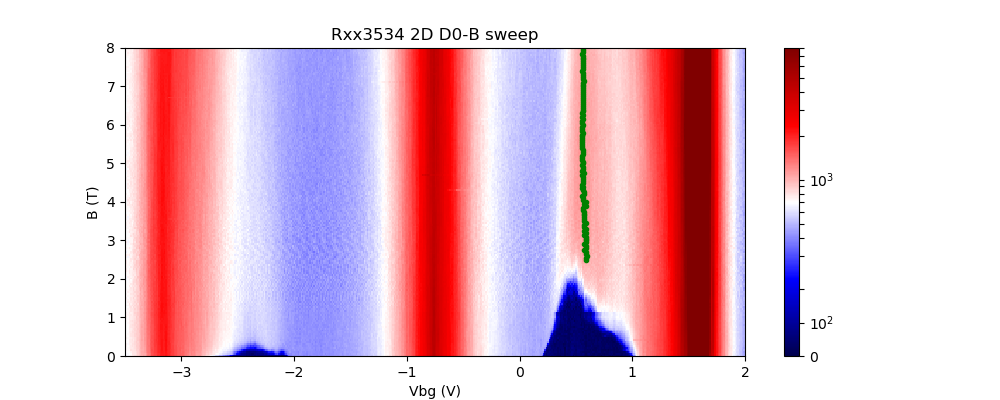

Text(0.5, 1.0, 'Rxx3534 2D D0-B sweep')

In [490]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(300,  vmin=0, vmax=8e3))
for i in range(50,len(B)):
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 300:390], 2), prominence=0.8, width=10)
    for f in range(len(peaks)):
        plt.plot(vg[300+peaks[f]], B[i], ".", color = 'green')
plt.xlabel('Vbg (V)')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('Rxx3534 2D D0-B sweep')

<IPython.core.display.Javascript object>


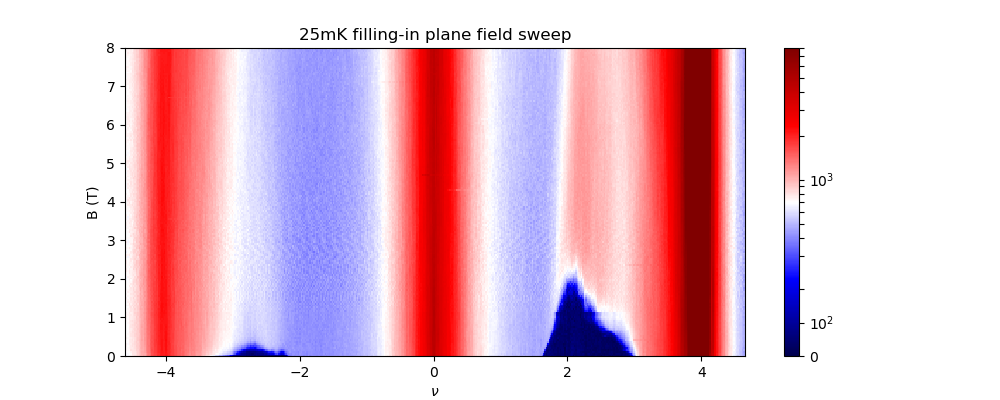

Text(0.5, 1.0, '25mK filling-in plane field sweep')

In [504]:
plt.figure(figsize=(10, 4))
plt.pcolormesh((vg[:]+0.7625)/(0.7625+1.6117)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(300,  vmin=0, vmax=8e3))

plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('25mK filling-in plane field sweep')

<IPython.core.display.Javascript object>


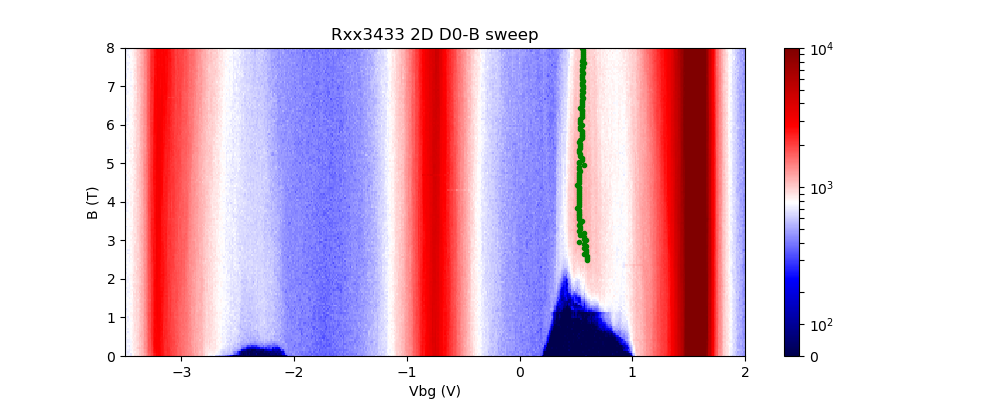

Text(0.5, 1.0, 'Rxx3433 2D D0-B sweep')

In [233]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, B, Rxx3433, cmap='seismic', norm=colors.SymLogNorm(300,  vmin=0, vmax=10e3))
for i in range(50,len(B)):
    peaks, _ = find_peaks(gaussian_filter(Rxx3433[i, 300:390], 2), prominence=0.8, width=10)
    for f in range(len(peaks)):
        plt.plot(vg[300+peaks[f]], B[i], ".", color = 'green')
plt.xlabel('Vbg (V)')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('Rxx3433 2D D0-B sweep')

<IPython.core.display.Javascript object>


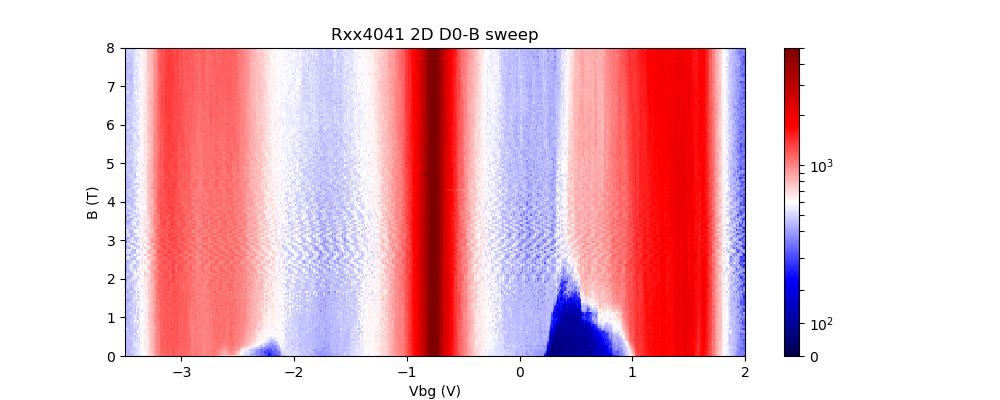

Text(0.5, 1.0, 'Rxx4041 2D D0-B sweep')

In [27]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, B, Rxx4041, cmap='seismic', norm=colors.SymLogNorm(350,  vmin=0, vmax=5e3))

plt.xlabel('Vbg (V)')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('Rxx4041 2D D0-B sweep')

# 35-34 D0 T dependence

In [681]:
data_D0_T_base = qc.load_data('data/2020-09-05/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_baseT_21-39-49')
data_D0_T_1 = qc.load_data('data/2020-09-05/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweepto1K_21-59-28')
data_D0_T_2 = qc.load_data('data/2020-09-06/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p05to1p4K_08-51-18')
data_D0_T_3 = qc.load_data('data/2020-09-06/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p45to2K_10-53-21')
data_D0_T_4 = qc.load_data('data/2020-09-06/#004_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_2p1to10K_14-00-29')
data_D0_T_5 = qc.load_data('data/2020-09-07/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_10p5to30K_10-15-14')
data_D0_T_6 = qc.load_data('data/2020-09-07/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_30p5to40K_21-03-39')
vg = data_D0_T_base.zeroDparam_set[:]
T = np.concatenate(([0.025], data_D0_T_1.triton_pid_setpoint_set[:],data_D0_T_2.triton_pid_setpoint_set[:], data_D0_T_3.triton_pid_setpoint_set[:], data_D0_T_4.triton_pid_setpoint_set[:], data_D0_T_5.triton_pid_setpoint_set[:], data_D0_T_6.triton_pid_setpoint_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin830_2')))

<IPython.core.display.Javascript object>


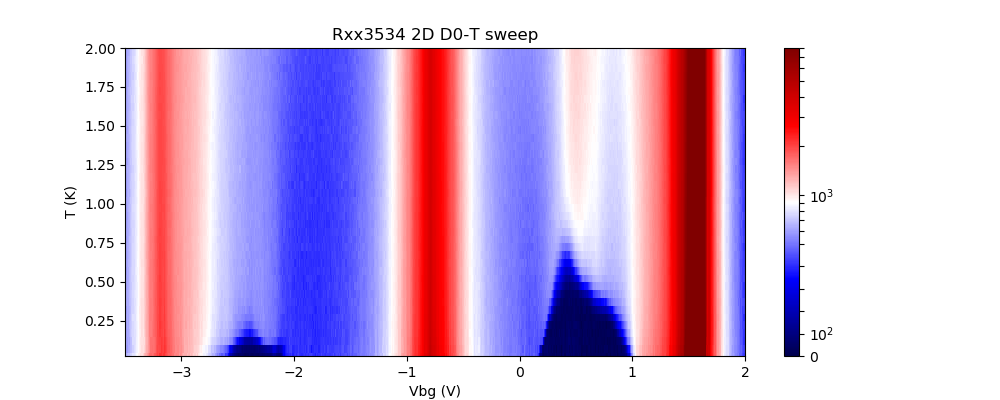

Text(0.5, 1.0, 'Rxx3534 2D D0-T sweep')

In [640]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.ylim(0.025,2)
plt.title('Rxx3534 2D D0-T sweep')

<IPython.core.display.Javascript object>


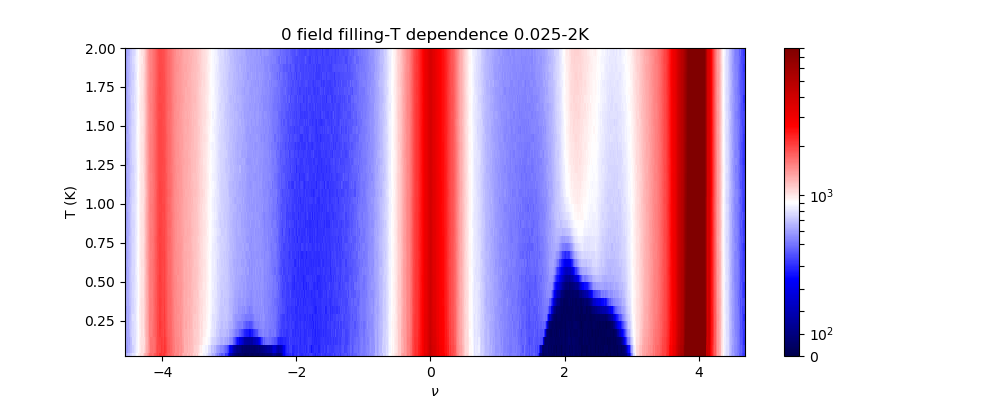

Text(0.5, 1.0, '0 field filling-T dependence 0.025-2K')

In [577]:
plt.figure(figsize=(10, 4))
plt.pcolormesh((vg+0.79)/(0.79+1.59)*4, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))

plt.xlabel(r'$\nu$')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.ylim(0.025,2)
plt.title('0 field filling-T dependence 0.025-2K')

<IPython.core.display.Javascript object>


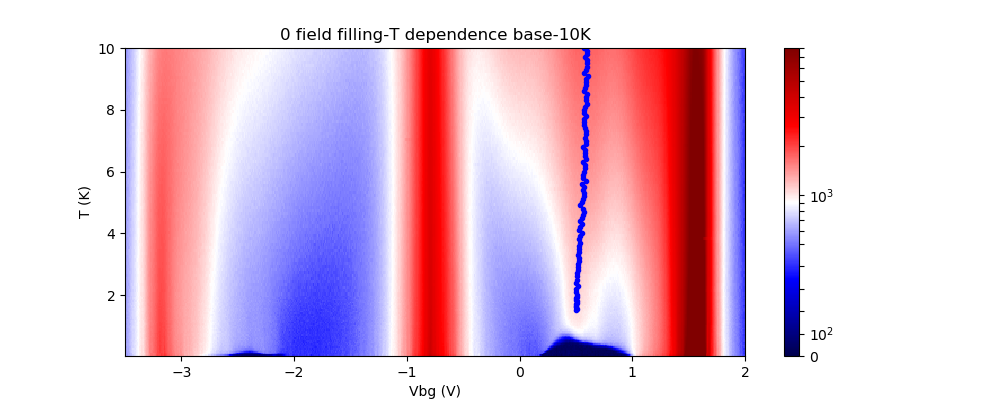

Text(0.5, 1.0, '0 field filling-T dependence base-10K')

In [581]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))
for i in range(30,len(T)):
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 390:450], 2), prominence=0.8, width=10)
    for f in range(len(peaks)):
        plt.plot(vg[390+peaks[f]], T[i], ".", color = 'blue')
plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.ylim(0.025,10)
plt.title('0 field filling-T dependence base-10K')

<IPython.core.display.Javascript object>


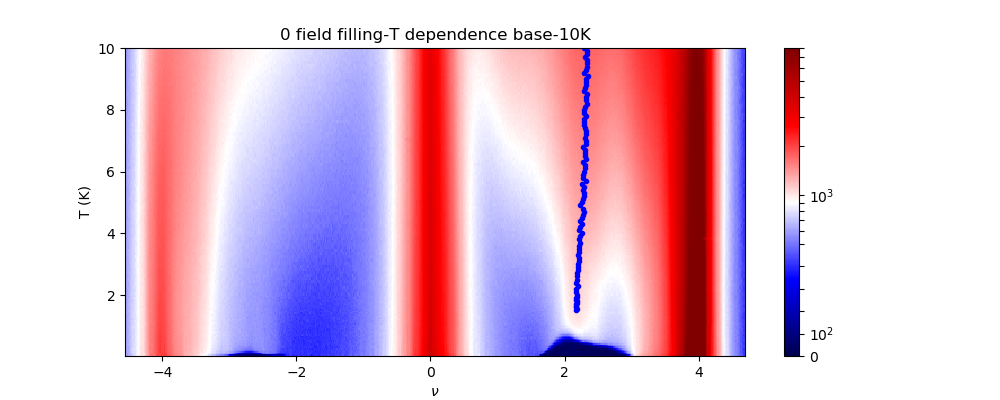

Text(0.5, 1.0, '0 field filling-T dependence base-10K')

In [582]:
plt.figure(figsize=(10, 4))
plt.pcolormesh((vg+0.79)/(0.79+1.59)*4, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))
for i in range(30,len(T)):
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 390:450], 2), prominence=0.8, width=10)
    for f in range(len(peaks)):
        plt.plot((vg[390+peaks[f]]+0.79)/(0.79+1.59)*4, T[i], ".", color = 'blue')
plt.xlabel(r'$\nu$')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.ylim(0.025,10)
plt.title('0 field filling-T dependence base-10K')

<IPython.core.display.Javascript object>


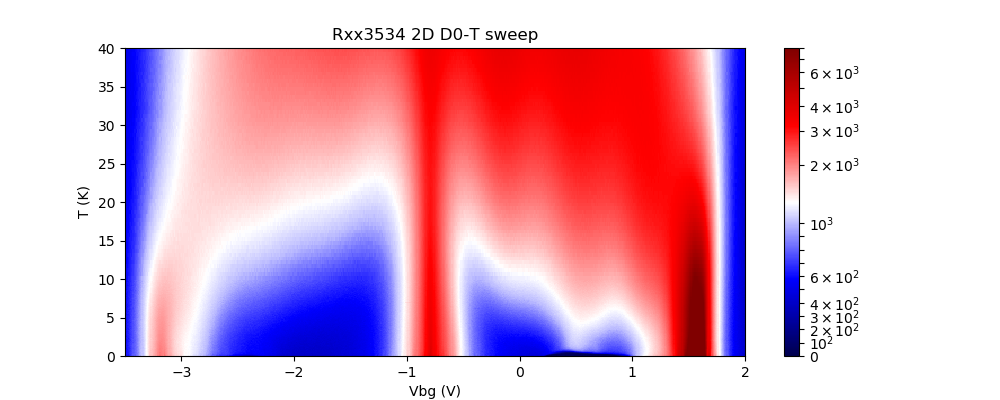

Text(0.5, 1.0, 'Rxx3534 2D D0-T sweep')

In [422]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(1000,  vmin=0, vmax=8e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.title('Rxx3534 2D D0-T sweep')

<IPython.core.display.Javascript object>


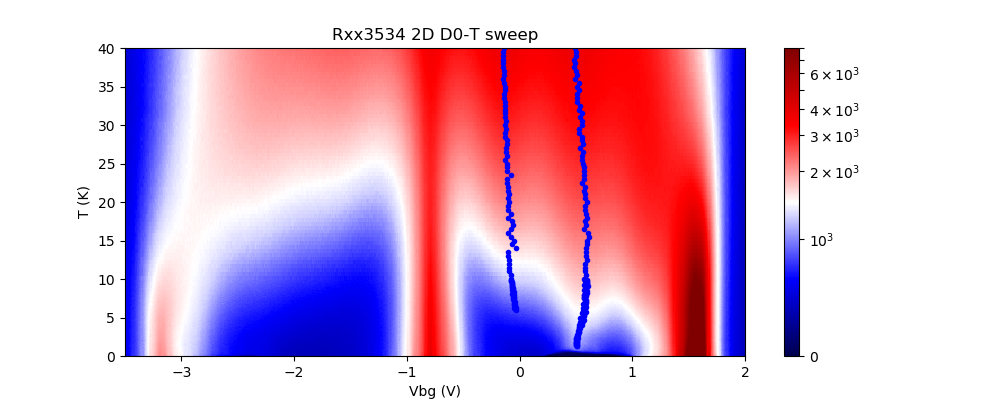

Text(0.5, 1.0, 'Rxx3534 2D D0-T sweep')

In [481]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(1200,  vmin=0, vmax=8e3))

for i in range(128,len(T)):#1/4 high T
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 300:380], 2), prominence=0.1, width=3)
    for f in range(len(peaks)):
        plt.plot(vg[300+peaks[f]], T[i], ".", color = 'blue')

for i in range(80,128):#1/4 low T
    indx=1*i 
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[indx, :], 5), n=2), 10)
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    for f in range(3,4):
        plt.plot(vg[peaks[f]+2], T[i], ".", color = 'blue')
        
for i in range(26,len(T)):#1/2
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 380:450], 2), prominence=0.1, width=3)
    for f in range(len(peaks)):
        plt.plot(vg[380+peaks[f]], T[i], ".", color = 'blue')

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.title('Rxx3534 2D D0-T sweep')

<IPython.core.display.Javascript object>


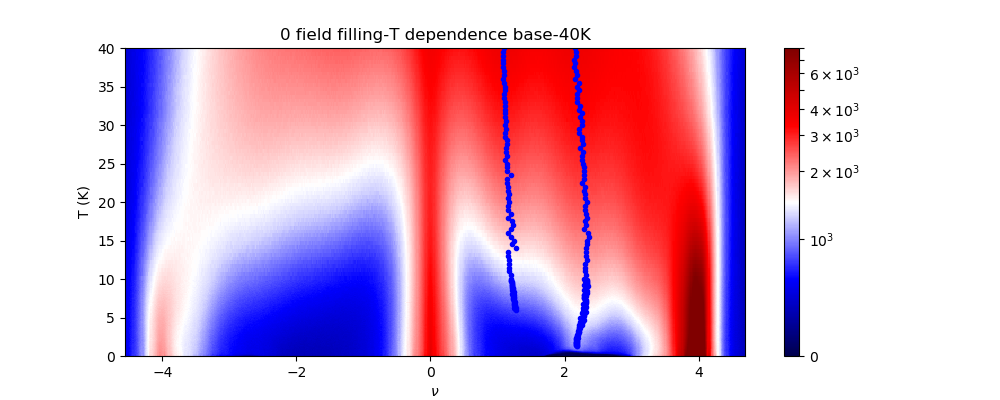

Text(0.5, 1.0, '0 field filling-T dependence base-40K')

In [587]:
plt.figure(figsize=(10, 4))
plt.pcolormesh((vg+0.79)/(0.79+1.59)*4, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(1200,  vmin=0, vmax=8e3))

for i in range(128,len(T)):#1/4 high T
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 300:380], 2), prominence=0.1, width=3)
    for f in range(len(peaks)):
        plt.plot((vg[300+peaks[f]]+0.79)/(0.79+1.59)*4, T[i], ".", color = 'blue')

for i in range(80,128):#1/4 low T
    indx=1*i 
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[indx, :], 5), n=2), 10)
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    for f in range(3,4):
        plt.plot((vg[peaks[f]+2]+0.79)/(0.79+1.59)*4, T[i], ".", color = 'blue')
        
for i in range(26,len(T)):#1/2
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 380:450], 2), prominence=0.1, width=3)
    for f in range(len(peaks)):
        plt.plot((vg[380+peaks[f]]+0.79)/(0.79+1.59)*4, T[i], ".", color = 'blue')

plt.xlabel(r'$\nu$')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.title('0 field filling-T dependence base-40K')

<IPython.core.display.Javascript object>


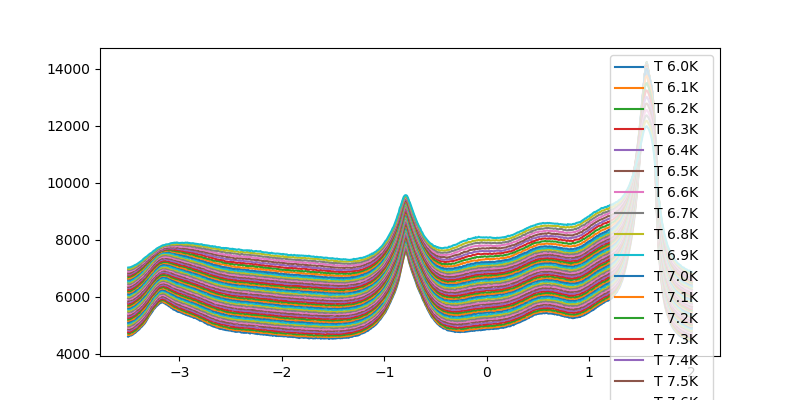

In [476]:
plt.figure(figsize=(8, 4))
for i in range(80, 130):
    indx=1*i 
    plt.plot(vg, Rxx3534[indx, :]+50*i, label='T {}K'.format(T[indx]))
    
plt.legend()

<IPython.core.display.Javascript object>


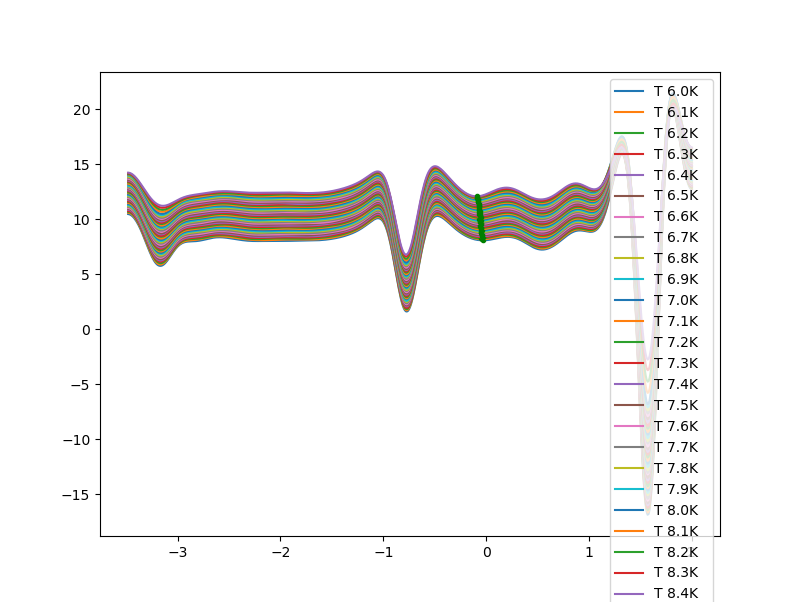

In [477]:
#
plt.figure(figsize=(8, 6))
for i in range(80,125):
    indx=1*i 
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[indx, :], 5), n=2), 10)
    plt.plot(vg[2:], snd_diff+i*0.1, label='T {}K'.format(T[indx]))
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    for f in range(3,4):
        plt.plot(vg[peaks[f]+2], snd_diff[peaks[f]]+i*0.1, ".", color = 'green')
plt.legend()

<IPython.core.display.Javascript object>


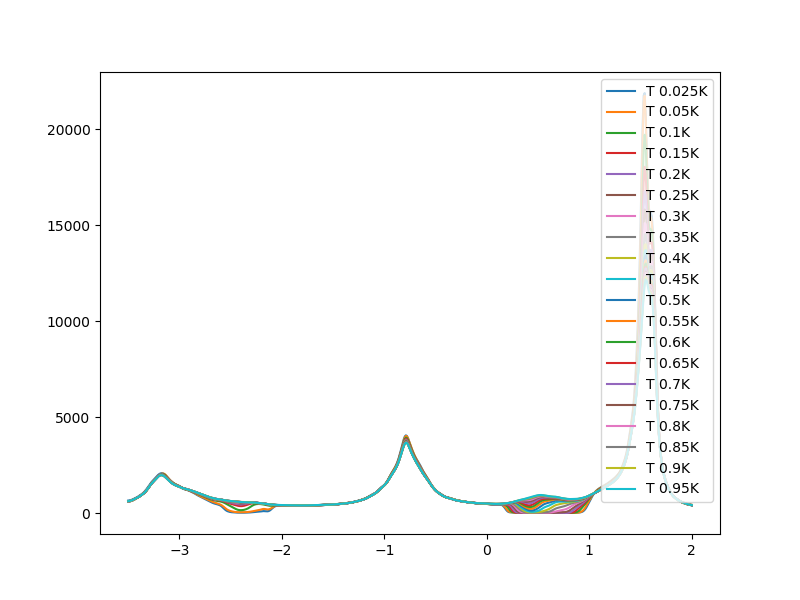

In [683]:
plt.figure(figsize=(8, 6))
for i in range(0, 20):
    indx=6*i 
    plt.plot(vg, gaussian_filter(Rxx3534[indx, :], 2), label='T {}K'.format(T[indx]))
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[indx, 300:450], 2), prominence=0.1, width=3)
    plt.plot(vg[300+peaks], Rxx3534[indx, 300+peaks], ".", color = 'r')
plt.legend()

In [142]:
from numpy import diff

<IPython.core.display.Javascript object>


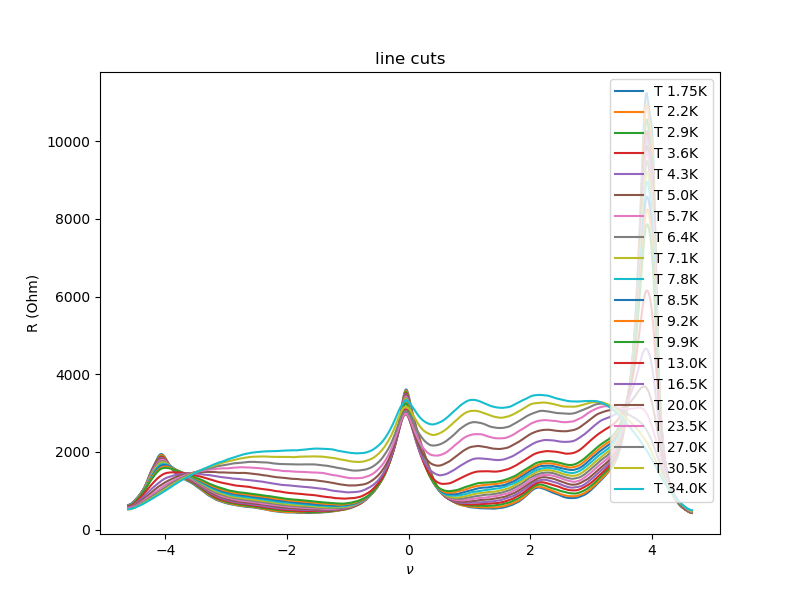

Text(0.5, 1.0, 'line cuts')

In [600]:
plt.figure(figsize=(8, 6))
for i in range(5, 25):
    indx=7*i 
    plt.plot((vg[:]+0.7625)/(0.7625+1.6117)*4, gaussian_filter(Rxx3534[indx, :], 2), label='T {}K'.format(T[indx]))

plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

# 34-35 5K in plane field

In [602]:
data_D0_B_5K = qc.load_data('data/2020-09-08/#002_S3_865_35-34_830_34-33_8302_40-41_3nA_0D_0to5T_fieldgate_5K_10-37-35')
data_D0_B_5K_2 = qc.load_data('data/2020-09-08/#003_S3_865_35-34_830_34-33_8302_40-41_3nA_0D_5p1to8T_fieldgate_5K_22-39-14')
vg = data_D0_B_5K.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B_5K.triton_field_set_stable_set[:],data_D0_B_5K_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B_5K, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_5K_2, 3e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B_5K, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_5K_2, 3e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B_5K, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_5K_2, 3e-9, 'lockin830_2')))

<IPython.core.display.Javascript object>


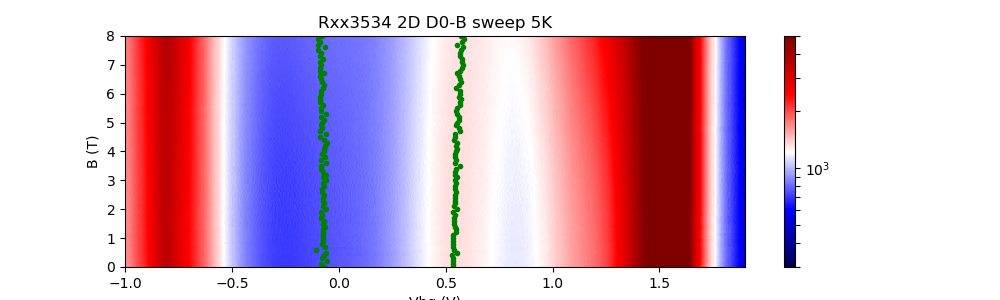

Text(0.5, 1.0, 'Rxx3534 2D D0-B sweep 5K')

In [603]:
plt.figure(figsize=(10, 3))
plt.pcolormesh(vg, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(300,  vmin=300, vmax=5e3))

for i in range(len(B)):#1 quarter
    indx=1*i 
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[indx, :], 5), n=2), 10)
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    for f in range(1,2):
        plt.plot(vg[peaks[f]+2], B[i], ".", color = 'green')
        
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:400], 2), prominence=0.5, width=10)
    for f in range(len(peaks)):
        plt.plot(vg[290+peaks[f]], B[i], ".", color = 'green')
        
plt.xlabel('Vbg (V)')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('Rxx3534 2D D0-B sweep 5K')

<IPython.core.display.Javascript object>


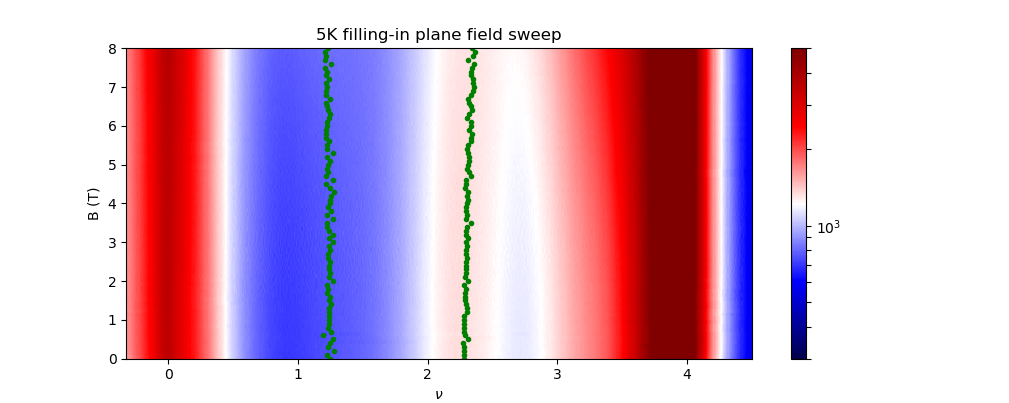

Text(0.5, 1.0, '5K filling-in plane field sweep')

In [611]:
plt.figure(figsize=(10, 3))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(300,  vmin=300, vmax=5e3))

for i in range(len(B)):#1 quarter
    indx=1*i 
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[indx, :], 5), n=2), 10)
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    for f in range(1,2):
        plt.plot((vg[peaks[f]+2]+0.805)/(0.805+1.546)*4, B[i], ".", color = 'green')
        
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:400], 2), prominence=0.5, width=10)
    for f in range(len(peaks)):
        plt.plot((vg[290+peaks[f]]+0.805)/(0.805+1.546)*4, B[i], ".", color = 'green')
        
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('5K filling-in plane field sweep')

<IPython.core.display.Javascript object>


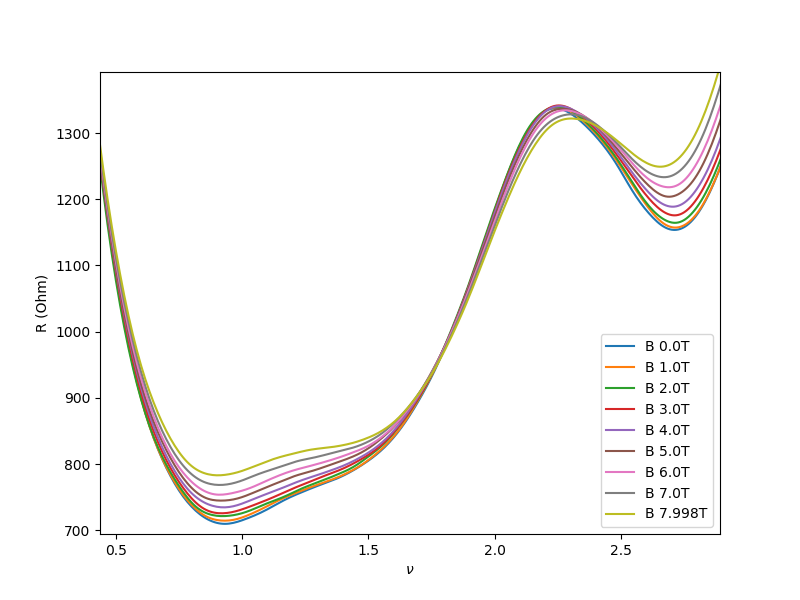

Text(0, 0.5, 'R (Ohm)')

In [613]:
plt.figure(figsize=(8, 6))
for i in range(0, 9):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 5), label='B {}T'.format(B[indx]))
plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

<IPython.core.display.Javascript object>


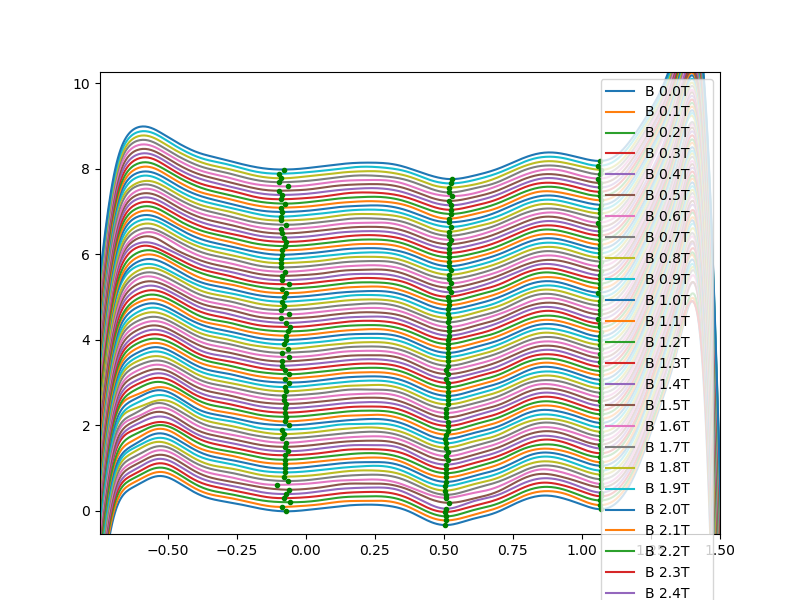

In [518]:
plt.figure(figsize=(8, 6))
for i in range(len(B)):
    indx=1*i 
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[indx, :], 5), n=2), 10)
    plt.plot(vg[2:], snd_diff+i*0.1, label='B {}T'.format(B[indx]))
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    for f in range(len(peaks)):
        plt.plot(vg[peaks[f]+2], snd_diff[peaks[f]]+i*0.1, ".", color = 'green')
plt.legend()

# 12K in plane field data

In [656]:
data_D0_B_12K = qc.load_data('data/2020-09-09/#004_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_5p1to8T_fieldgate_12K_13-37-45')
data_D0_B_12K_2 = qc.load_data('data/2020-09-09/#005_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_12K_23-09-21')
vg = data_D0_B_12K.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B_12K.triton_field_set_stable_set[:],data_D0_B_12K_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B_12K, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_12K_2, 3e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B_12K, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_12K_2, 3e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B_12K, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_12K_2, 3e-9, 'lockin830_2')))

In [529]:
vg[100]

-0.5

<IPython.core.display.Javascript object>


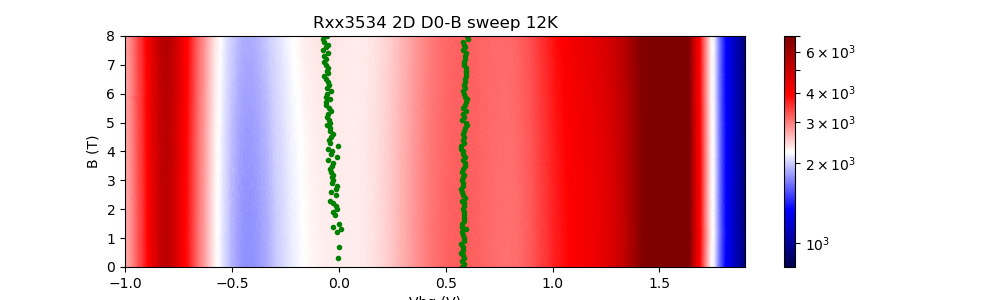

Text(0.5, 1.0, 'Rxx3534 2D D0-B sweep 12K')

In [657]:
plt.figure(figsize=(10, 3))
plt.pcolormesh(vg, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(2000,  vmin=700, vmax=7e3))

for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
    for f in range(len(peaks)):
        plt.plot(vg[100+peaks[f]], B[i], ".", color = 'green')
        
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:350], 2), prominence=0.5, width=10)
    for f in range(len(peaks)):
        plt.plot(vg[290+peaks[f]], B[i], ".", color = 'green')
        
plt.xlabel('Vbg (V)')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('Rxx3534 2D D0-B sweep 12K')

<IPython.core.display.Javascript object>


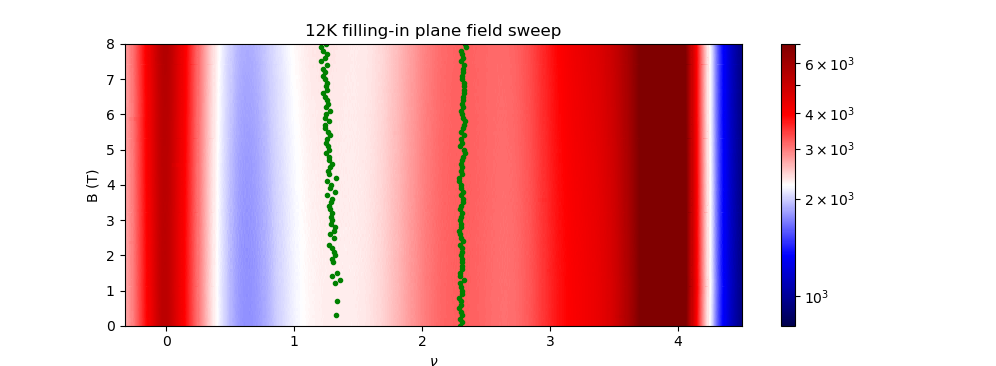

Text(0.5, 1.0, '12K filling-in plane field sweep')

In [635]:
plt.figure(figsize=(10, 3))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(2000,  vmin=700, vmax=7e3))

for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
    for f in range(len(peaks)):
        plt.plot((vg[100+peaks[f]]+0.805)/(0.805+1.6)*4, B[i], ".", color = 'green')
        
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:350], 2), prominence=0.5, width=10)
    for f in range(len(peaks)):
        plt.plot((vg[290+peaks[f]]+0.805)/(0.805+1.6)*4, B[i], ".", color = 'green')
        
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('12K filling-in plane field sweep')

<IPython.core.display.Javascript object>


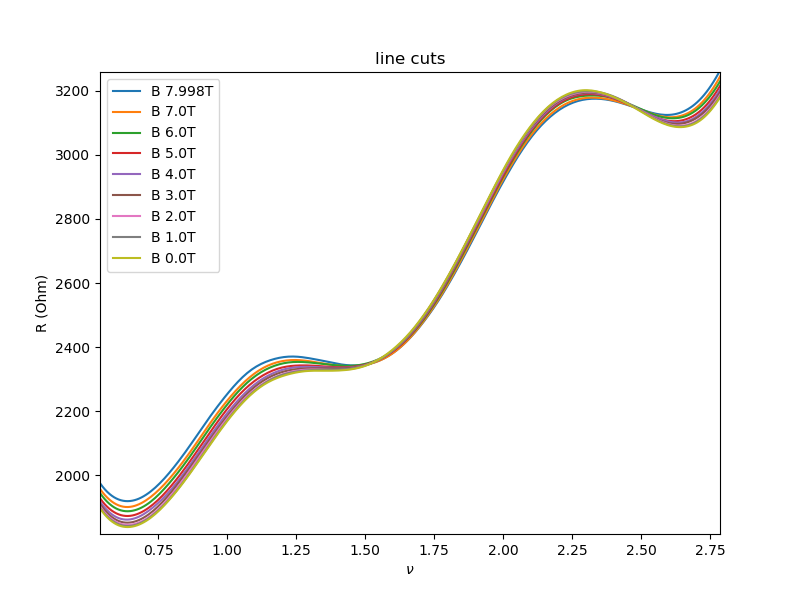

Text(0.5, 1.0, 'line cuts')

In [633]:
plt.figure(figsize=(8, 6))
for i in range(0, 9):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 5), label='B {}T'.format(B[indx]))
plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

# 16K in plane field data

In [706]:
data_D0_B_16K = qc.load_data('data/2020-09-10/#001_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_16K_13-56-19')
data_D0_B_16K_2 = qc.load_data('data/2020-09-11/#001_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6p1to8T_fieldgate_16K_03-57-04')
vg = data_D0_B_16K.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B_16K.triton_field_set_stable_set[:],data_D0_B_16K_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B_16K, 5e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_16K_2, 5e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B_16K, 5e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_16K_2, 5e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B_16K, 5e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_16K_2, 5e-9, 'lockin830_2')))

<IPython.core.display.Javascript object>


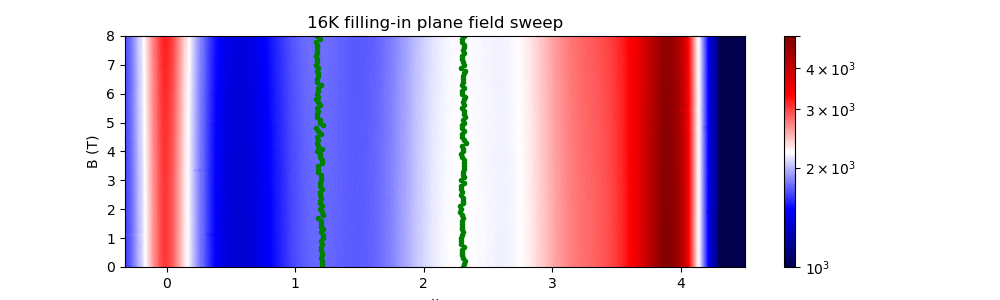

Text(0.5, 1.0, '16K filling-in plane field sweep')

In [707]:
plt.figure(figsize=(10, 3))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(1000,  vmin=1000, vmax=5e3))

for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
    for f in range(len(peaks)):
        plt.plot((vg[100+peaks[f]]+0.805)/(0.805+1.6)*4, B[i], ".", color = 'green')
        
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:350], 2), prominence=0.5, width=10)
    for f in range(len(peaks)):
        plt.plot((vg[290+peaks[f]]+0.805)/(0.805+1.6)*4, B[i], ".", color = 'green')
        
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('16K filling-in plane field sweep')

<IPython.core.display.Javascript object>


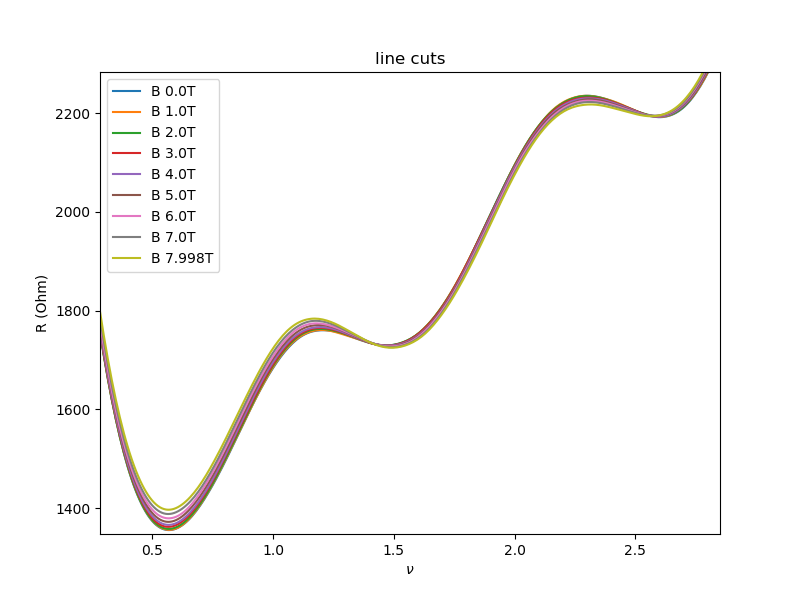

Text(0.5, 1.0, 'line cuts')

In [708]:
plt.figure(figsize=(8, 6))
for i in range(0, 9):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 5), label='B {}T'.format(B[indx]))
plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

# 22K in plane field data

In [709]:
data_D0_B_22K = qc.load_data('data/2020-09-11/#002_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_8to6p1T_fieldgate_22K_13-57-29')
data_D0_B_22K_2 = qc.load_data('data/2020-09-11/#003_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_22K_23-30-47')
vg = data_D0_B_22K.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B_22K.triton_field_set_stable_set[:],data_D0_B_22K_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B_22K, 5e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_22K_2, 5e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B_22K, 5e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_22K_2, 5e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B_22K, 5e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_22K_2, 5e-9, 'lockin830_2')))

<IPython.core.display.Javascript object>


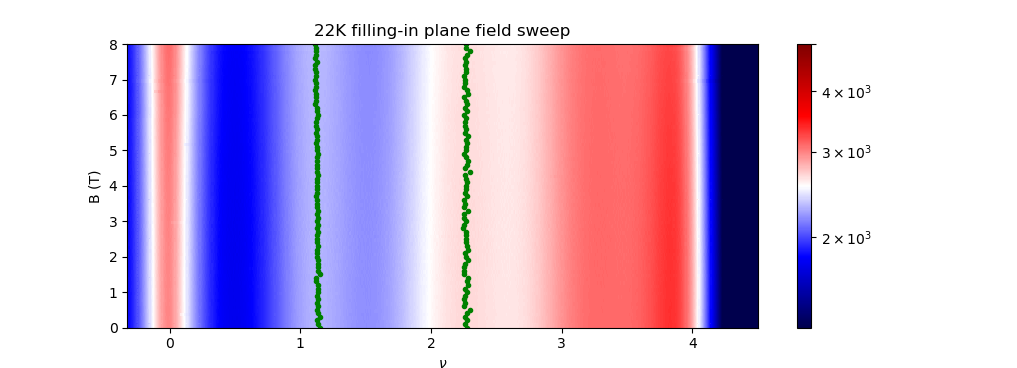

Text(0.5, 1.0, '22K filling-in plane field sweep')

In [710]:
plt.figure(figsize=(10, 3))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(1000,  vmin=1300, vmax=5e3))

for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
    for f in range(len(peaks)):
        plt.plot((vg[100+peaks[f]]+0.805)/(0.805+1.6)*4, B[i], ".", color = 'green')
        
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:350], 2), prominence=0.5, width=10)
    for f in range(len(peaks)):
        plt.plot((vg[290+peaks[f]]+0.805)/(0.805+1.6)*4, B[i], ".", color = 'green')
        
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('22K filling-in plane field sweep')

<IPython.core.display.Javascript object>


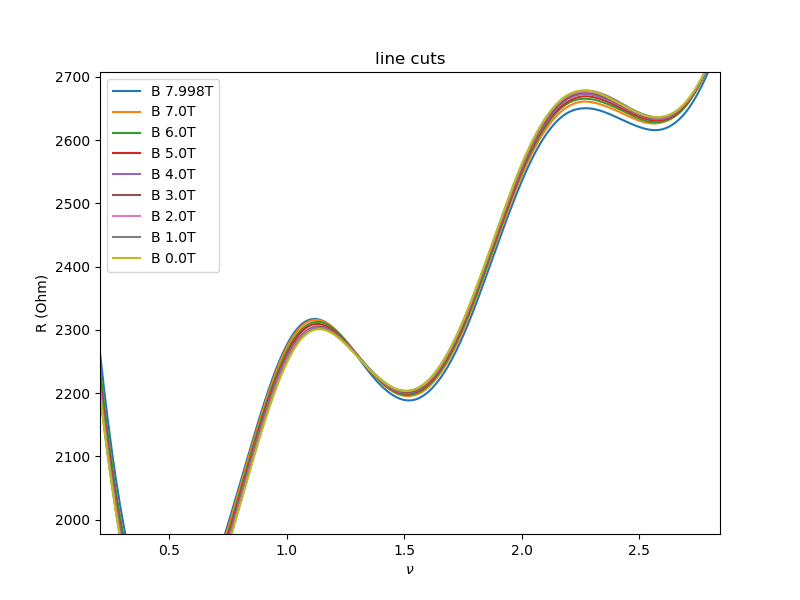

Text(0.5, 1.0, 'line cuts')

In [711]:
plt.figure(figsize=(8, 6))
for i in range(0, 9):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 5), label='B {}T'.format(B[indx]))
plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

# 34-33 D0 T dependence

/Users/yiranzhang/anaconda3/envs/qcodes/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


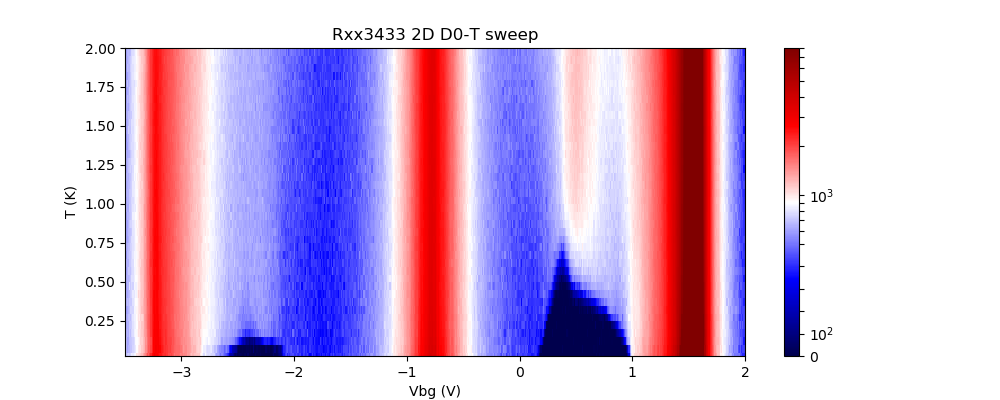

Text(0.5, 1.0, 'Rxx3433 2D D0-T sweep')

In [57]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3433, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.ylim(0.025,2)
plt.axis()
plt.title('Rxx3433 2D D0-T sweep')

<IPython.core.display.Javascript object>


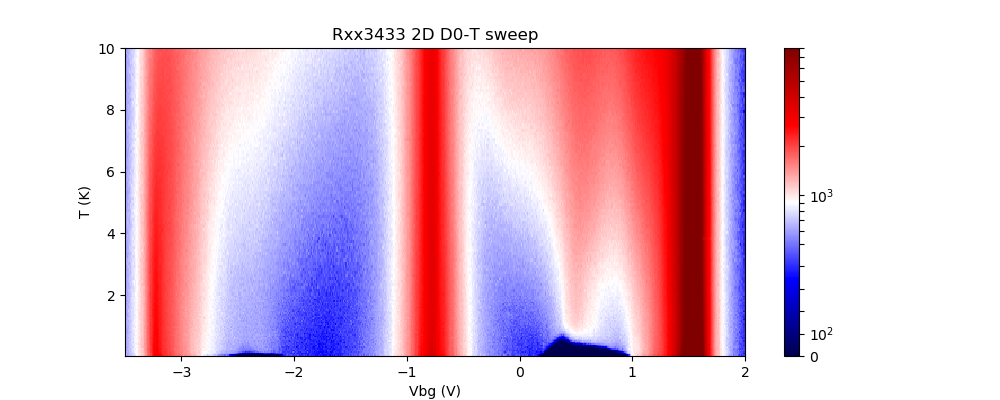

Text(0.5, 1.0, 'Rxx3433 2D D0-T sweep')

In [52]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3433, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.ylim(0.025,10)
plt.axis()
plt.title('Rxx3433 2D D0-T sweep')

<IPython.core.display.Javascript object>


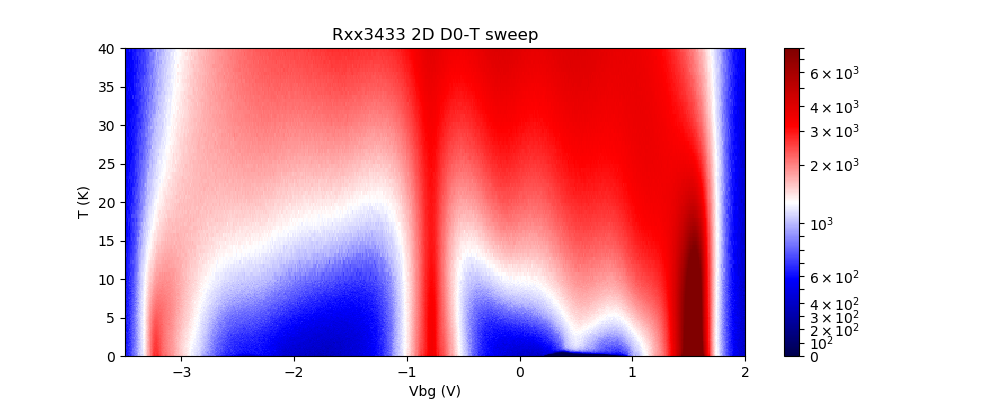

Text(0.5, 1.0, 'Rxx3433 2D D0-T sweep')

In [56]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3433, cmap='seismic', norm=colors.SymLogNorm(1000,  vmin=0, vmax=8e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.title('Rxx3433 2D D0-T sweep')

<IPython.core.display.Javascript object>


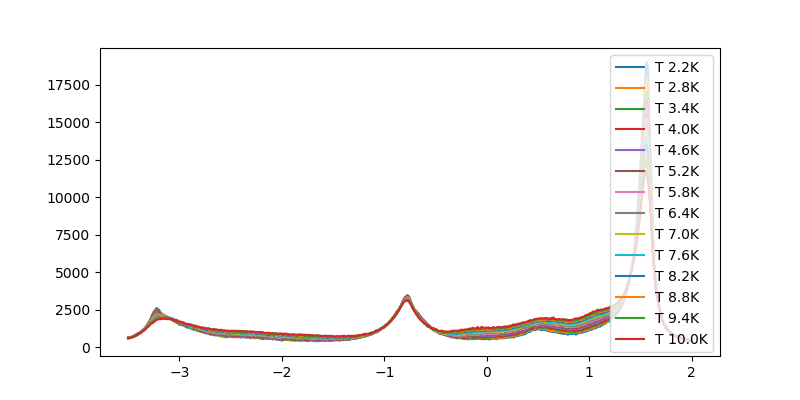

In [58]:
plt.figure(figsize=(8, 4))
for i in range(5, 19):
    indx=6*i + 12
    plt.plot(vg, Rxx3433[indx, :], label='T {}K'.format(T[indx]))
    
plt.legend()

<IPython.core.display.Javascript object>


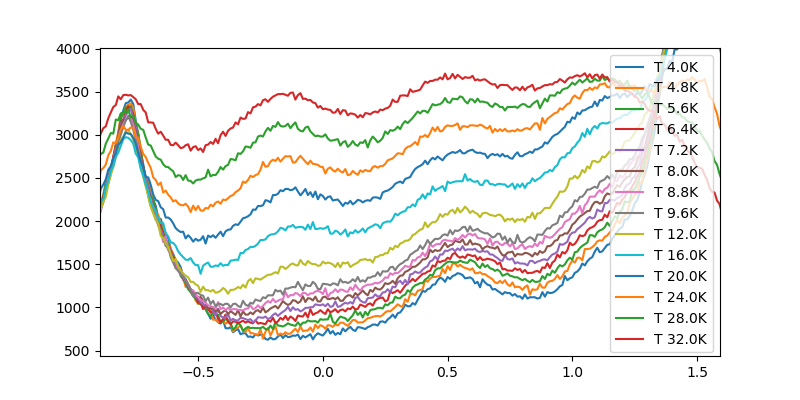

In [59]:
plt.figure(figsize=(8, 4))
for i in range(5, 19):
    indx=8*i + 20
    plt.plot(vg, Rxx3433[indx, :], label='T {}K'.format(T[indx]))
    
plt.legend()

# 40-41 D0 T dependence

<IPython.core.display.Javascript object>


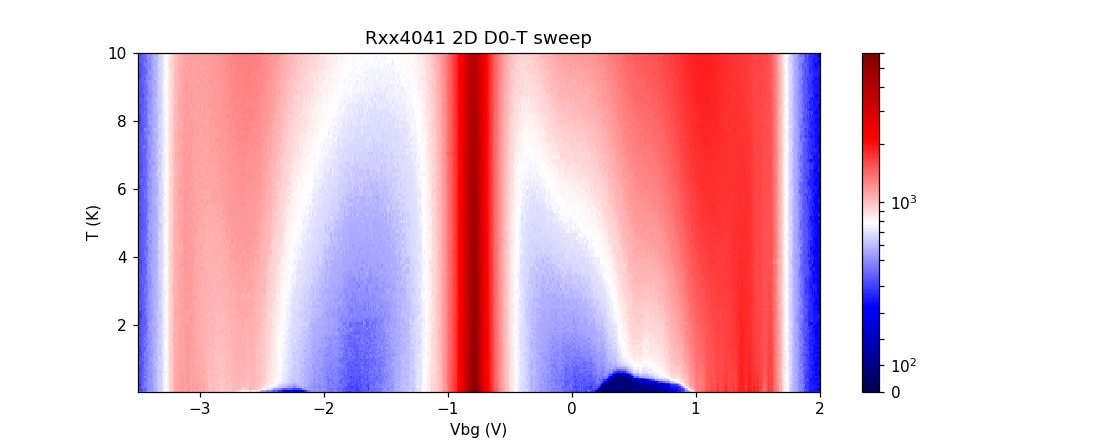

Text(0.5, 1.0, 'Rxx4041 2D D0-T sweep')

In [240]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx4041, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=6e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.title('Rxx4041 2D D0-T sweep')

<IPython.core.display.Javascript object>


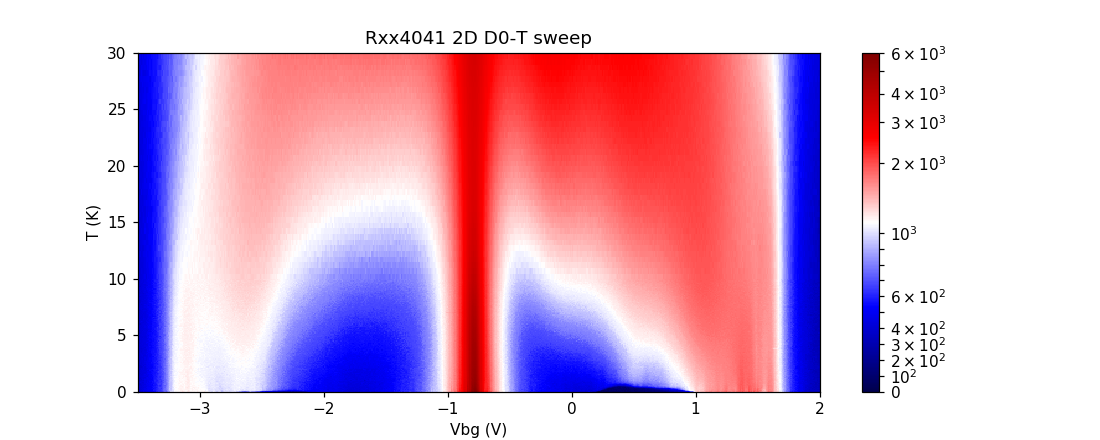

Text(0.5, 1.0, 'Rxx4041 2D D0-T sweep')

In [269]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx4041, cmap='seismic', norm=colors.SymLogNorm(1000,  vmin=0, vmax=6e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.title('Rxx4041 2D D0-T sweep')

# 0D critical current measurements

In [166]:
# quick gate sweep (0 DC current)
d0d = qc.load_data('data/2020-09-16/#002_S3_865_35-34_830_34-33_8302_40-41_0p5nA_0Dsweep_baseT_11-27-13')
vbg0 = d0d.zeroDparam_set[:]
Rxx3534 = npd.Rxxfromdata(d0d, 0.5e-9, 'lockin865')
Rxx3433 = npd.Rxxfromdata(d0d, 0.5e-9, 'lockin830')
Rxx4041 = npd.Rxxfromdata(d0d, 0.5e-9, 'lockin830_2')

In [167]:
plt.figure()
plt.plot(vbg0, gaussian_filter(Rxx3534, 0.8)/1000)
plt.plot(vbg0, gaussian_filter(Rxx3433, 0.8)/1000)
plt.plot(vbg0, gaussian_filter(Rxx4041, 0.8)/1000)
plt.legend(['35-34', '34-33', '40-41'])
plt.axis((-3.5347371715660776,
 2.036581563800728,
 -0.5027601300500764,
 4.705614952772431))

plt.xlabel('V$_{bg} \propto n$')
plt.ylabel('R$_{xx}$ (k$\Omega$)')
# plt.savefig(figfile + 'S3_fewelectrodes_0D_gatesweep.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
#Ic vs gate
dIg0d = qc.load_data('data/2020-09-16/#003_S3_865_35-34_830_34-33_8302_40-41_0p5nA_0Dsweep_baseT_11-41-46')
Ig0d = dIg0d.srframe_volt_p7_set[0, :]*10 # in nA
vbg0d = dIg0d.zeroDparam_set[:]
Rg0d3534 = dIg0d.lockin865_X[:, :]/0.5e-9
Rg0d3433 = dIg0d.lockin830_X[:, :]/0.5e-9
Rg0d4041 = dIg0d.lockin830_2_X[:, :]/0.5e-9

Note that at the moment:

- Red lines: I$_{offset}$ vs. D (green line in 2d plot) and Ioffset vs. B
- Yellow lines: Just I$_{offset}$ vs. D

In [299]:
fig, ax = plt.subplots(3, 1, figsize=(4, 10))
ax[0].set_title('35-34')
p0 = ax[0].pcolormesh(vbg0d, Ig0d, Rg0d3534.T, vmin=0, vmax=2000, rasterized=True)
ax[0].vlines([0.4, 0.55], -100, 100, lw=0.6, colors=['red', 'yellow'])
ax[0].set_ylim(-80, 80)
# ax[0].set_xlabel('V$_{bg}$')
ax[0].set_ylabel('I$_{offset}$ (nA)')
# plt.colorbar(p0, ax=ax[0], orientation='horizontal')
ax[1].set_title('34-33')
ax[1].pcolormesh(vbg0d, Ig0d, Rg0d3433.T, vmin=0, vmax=2000, rasterized=True)
ax[1].vlines([0.4, 0.55], -100, 100, lw=0.6, colors=['red', 'yellow'])
ax[1].set_ylim(-80, 80)
# ax[1].set_xlabel('V$_{bg}$')
ax[2].set_title('40-41')
ax[2].pcolormesh(vbg0d, Ig0d, Rg0d4041.T, vmin=0, vmax=2000, rasterized=True)
ax[2].vlines([0.4, 0.55], -100, 100, lw=0.6, colors=['red', 'yellow'])
ax[2].set_xlabel('V$_{bg} \propto n$')
ax[2].set_ylim(-80, 80)
plt.tight_layout()

# red lines are drawn where the Ic vs. B diagram was taken (seemed like the largest critical current)
# plt.savefig(figfile + 'S3_ElecSC_0D_GateIc_upright.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
# Ic vs. B diagrams:
plt.figure()
plt.pcolormesh()

# HighD critical current measurements

In [17]:
Hddg = qc.load_data('data/2020-09-15/#002_S3_865_35-34_830_34-33_8302_40-41_2nA_0T_sweep_baseT_08-59-55')
vbg = Hddg.highDparam_set[:]
RHdg = npd.Rxxfromdata(Hddg, 2e-9, 'lockin865')

In [18]:
plt.figure()
plt.plot(vbg, RHdg)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Figuring out the second Vbg (for the highD line) to do I vs. D

In [291]:
sl1, b1 = 0.6629105490080421, 2.3201869215281476
sl2 = -0.6629105490080421
xgoal = -1.2

In [292]:
# intersection at:
b2 = xgoal*(sl1-sl2) + b1
print(b2)

0.7292016039088465


In [147]:
#Ic vs gate
dIghd = qc.load_data('data/2020-09-17/#003_S3_865_35-34_830_34-33_8302_40-41_0p5nA_highD_gate_Ic_baseT_18-40-09')
Ighd = dIghd.srframe_volt_p7_set[0, :]*10 # in nA
vbghd = dIghd.highDparam_set[:36]
Rghd3534 = dIghd.lockin865_X[:36, :]/0.5e-9
Rghd3433 = dIghd.lockin830_X[:36, :]/0.5e-9
Rghd4041 = dIghd.lockin830_2_X[:36, :]/0.5e-9

Note that at the moment:

- Red lines: I$_{offset}$ vs. D (green line in 2d plot) and Ioffset vs. B
- Yellow lines: Just I$_{offset}$ vs. D

In [300]:
fig, ax = plt.subplots(3, 1, figsize=(4, 10))
ax[0].set_title('35-34')
p0 = ax[0].pcolormesh(vbghd, Ighd, Rghd3534.T, vmin=0, vmax=2000, rasterized=True)
ax[0].vlines([-1.38, -1.2], -80, 80, lw=0.6, colors=['red', 'yellow'])
# ax[0].set_xlabel('V$_{bg}$')
ax[0].set_ylabel('I$_{offset}$ (nA)')
# plt.colorbar(p0, ax=ax[0], orientation='horizontal')
ax[1].set_title('34-33')
ax[1].pcolormesh(vbghd, Ighd, Rghd3433.T, vmin=0, vmax=2000, rasterized=True)
ax[1].vlines([-1.38, -1.2], -80, 80, lw=0.6, colors=['red', 'yellow'])
# ax[1].set_xlabel('V$_{bg}$')
ax[2].set_title('40-41')
ax[2].pcolormesh(vbghd, Ighd, Rghd4041.T, vmin=0, vmax=2000, rasterized=True)
ax[2].vlines([-1.38, -1.2], -80, 80, lw=0.6, colors=['red', 'yellow'])
ax[2].set_xlabel('V$_{bg} \propto n$')
plt.tight_layout()

# red lines are drawn where the Ic vs. B diagram was taken (seemed like the largest critical current)
# plt.savefig(figfile + 'S3_ElecSC_highD_GateIc_upright.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [116]:
dgDe = qc.load_data('data/2020-09-17/#005_S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_elecSC_baseT_23-53-52')

In [117]:
dgDe

DataSet:
   location = 'data/2020-09-17/#005_S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_elecSC_baseT_23-53-52'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | elecSCparam_set     | elecSCparam  | (88,)
   Setpoint | srframe_volt_p7_set | volt_p7      | (88, 181)
   Measured | lockin830_2_X       | X            | (88, 181)
   Measured | lockin830_2_Y       | Y            | (88, 181)
   Measured | lockin830_X         | X            | (88, 181)
   Measured | lockin830_Y         | Y            | (88, 181)
   Measured | lockin865_X         | X            | (88, 181)
   Measured | lockin865_Y         | Y            | (88, 181)

In [186]:
vbg = dgDe.elecSCparam_set[:]
Ic = dgDe.srframe_volt_p7_set[0, :]*10
RegSC3534 = dgDe.lockin865_X[:, :]/0.5e-9
RegSC3433 = dgDe.lockin830_X[:, :]/0.5e-9
RegSC4041 = dgDe.lockin830_2_X[:, :]/0.5e-9

In [187]:
plt.figure()
plt.pcolormesh(vbg, Ic, RegSC3534.T, rasterized=True, vmin=0, vmax=2000)
plt.xlabel('V$_{bg} \propto D$')
plt.ylabel('I$_{offset}$')
plt.colorbar(label='dV/dI ($\Omega$)')
plt.vlines((-1.38, 0.37), -90, 90, colors=('orange', 'white'), lw=0.6)

# plt.savefig(figfile + 'S3_3534_electron_sweepD.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [188]:
plt.figure()
plt.pcolormesh(vbg, Ic, RegSC3433.T, rasterized=True, vmin=0, vmax=2000)
plt.xlabel('V$_{bg} \propto D$')
plt.ylabel('I$_{offset}$')
plt.colorbar(label='dV/dI ($\Omega$)')
plt.vlines((-1.38, 0.37), -90, 90, colors=('orange', 'white'), lw=0.6)

# plt.savefig(figfile + 'S3_3433_electron_sweepD.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [189]:
plt.figure()
plt.pcolormesh(vbg, Ic, RegSC4041.T, rasterized=True, vmin=0, vmax=2000)
plt.xlabel('V$_{bg} \propto D$')
plt.ylabel('I$_{offset}$')
plt.colorbar(label='dV/dI ($\Omega$)')
plt.vlines((-1.38, 0.37), -90, 90, colors=('orange', 'white'), lw=0.6)

# plt.savefig(figfile + 'S3_4041_electron_sweepD.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## some line cuts at different Vbg

In [225]:
indxs = npd.val_to_index([-3.5, -2, -1.38, 0.37, 2, 4.5], vbg)
cs = ('black', 'purple', 'orange', 'white', 'blue', 'red')

-1.38 is not a value in the array
Plotted -1.40 instead
0.37 is not a value in the array
Plotted 0.40 instead


In [226]:
for i in indxs:
    print(i)
    print(vbg[i])

2
-3.5
17
-2.0
23
-1.4
41
0.399999999999999
57
2.0
82
4.5


Electrodes 35-34

In [227]:
plt.figure()
plt.pcolormesh(vbg, Ic, RegSC3534.T, rasterized=True, vmin=0, vmax=2000)
plt.xlabel('V$_{bg} \propto D$')
plt.ylabel('I$_{offset}$')
plt.colorbar(label='dV/dI ($\Omega$)')
plt.vlines((vbg[indxs]), -90, 90, colors=cs, lw=0.7)

plt.savefig(figfile + 'S3_3534_dvdi_withlines_elSCgreen.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [233]:

plt.figure(figsize=(7, 4.5))
for i in range(len(indxs)):
    if cs[i] == 'white':
        c = 'gray'
    else:
        c=cs[i]
    plt.plot(Ic, gaussian_filter(RegSC3534[indxs[i], :], 0.8), color=c, lw=0.7)
    
plt.xlabel('I$_{offset}$ (nA)')
plt.ylabel('dV/dI ($\Omega$)')
plt.savefig(figfile + 'S3_3534_dvdi_linecuts_elSCgreen.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Contacts 34-33

In [231]:
plt.figure()
plt.pcolormesh(vbg, Ic, RegSC3433.T, rasterized=True, vmin=0, vmax=2000)
plt.xlabel('V$_{bg} \propto D$')
plt.ylabel('I$_{offset}$')
plt.colorbar(label='dV/dI ($\Omega$)')
plt.vlines((vbg[indxs]), -90, 90, colors=cs, lw=0.7)

# plt.savefig(figfile + 'S3_3433_dvdi_withlines_elSCgreen.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [235]:

plt.figure(figsize=(7, 4.5))
for i in range(len(indxs)):
    if cs[i] == 'white':
        c = 'gray'
    else:
        c=cs[i]
    plt.plot(Ic, gaussian_filter(RegSC3433[indxs[i], :], 1), color=c, lw=0.7)
    
plt.xlabel('I$_{offset}$ (nA)')
plt.ylabel('dV/dI ($\Omega$)')
# plt.savefig(figfile + 'S3_3433_dvdi_linecuts_elSCgreen.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'dV/dI ($\\Omega$)')

## Hole side Ic vs. D

In [251]:
dgDh = qc.load_data('data/2020-09-18/#002_S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_holeSC_baseT_08-37-05')

In [252]:
vbg = dgDh.holeSCparam_set[:]
Ic = dgDh.srframe_volt_p7_set[0, :]*10
RhgSC3534 = dgDh.lockin865_X[:, :]/0.5e-9
RhgSC3433 = dgDh.lockin830_X[:, :]/0.5e-9
RhgSC4041 = dgDh.lockin830_2_X[:, :]/0.5e-9

In [253]:
plt.figure()
plt.pcolormesh(vbg, Ic, RhgSC3534.T, rasterized=True, vmin=0, vmax=1000)
plt.xlabel('V$_{bg} \propto D$')
plt.ylabel('I$_{offset}$')
plt.colorbar(label='dV/dI ($\Omega$)')
plt.vlines((-4.16, -2.41), -30, 30, colors=('orange', 'white'), lw=0.6)

# plt.savefig(figfile + 'S3_3534_hole_sweepD.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [254]:
plt.figure()
plt.pcolormesh(vbg, Ic, RhgSC3433.T, rasterized=True, vmin=0, vmax=1000)
plt.xlabel('V$_{bg} \propto D$')
plt.ylabel('I$_{offset}$')
plt.colorbar(label='dV/dI ($\Omega$)')
plt.vlines((-4.16, -2.41), -30, 30, colors=('orange', 'white'), lw=0.6)

# plt.savefig(figfile + 'S3_3433_hole_sweepD.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [255]:
plt.figure()
plt.pcolormesh(vbg, Ic, RhgSC4041.T, rasterized=True, vmin=0, vmax=1000)
plt.xlabel('V$_{bg} \propto D$')
plt.ylabel('I$_{offset}$')
plt.colorbar(label='dV/dI ($\Omega$)')
plt.vlines((-4.16, -2.41), -30, 30, colors=('orange', 'white'), lw=0.6)

# plt.savefig(figfile + 'S3_4041_hole_sweepD.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
vbgs = [-4.16, -2.41, 0.45, 2.6]
indxs = npd.val_to_index(vbgs, vbg)

In [267]:
plt.figure()
plt.pcolormesh(vbg, Ic, RhgSC3534.T, rasterized=True, vmin=0, vmax=1000)
plt.xlabel('V$_{bg} \propto D$')
plt.ylabel('I$_{offset}$')
plt.colorbar(label='dV/dI ($\Omega$)')
plt.vlines(vbg[indxs], -30, 30, colors=['#fab200', '#000000', '#fb0000', '#005dff'], lw=0.8)

# plt.savefig(figfile + 'S3_3534_dvdi_hole_withlines_sweepD.png', dpi=300, bbox_inches='tight')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [264]:

cs3534 = ['#fab200', '#000000', '#fb0000', '#005dff']
cs3433 = ['#fee094', '#b0b0b0', '#fbd2d2', '#9cc0fe']

plt.figure(figsize=(7, 4.5))
for i in range(len(indxs)):
    plt.plot(Ic, gaussian_filter(RhgSC3534[indxs[i], :], 1), color=cs3534[i], lw=0.7)
    plt.plot(Ic, gaussian_filter(RhgSC3433[indxs[i], :], 1), color=cs3433[i], lw=0.7)
    
plt.xlabel('I$_{offset}$ (nA)')
plt.ylabel('dV/dI ($\Omega$)')
plt.xlim(-20, 20)
# plt.savefig(figfile + 'S3_35343433_dvdi_linecuts_holeSCgreen.png', dpi=300, bbox_inches='tight')

-4.16 is not a value in the array
Plotted -4.20 instead
-2.41 is not a value in the array
Plotted -2.40 instead
0.45 is not a value in the array
Plotted 0.50 instead


/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Fan diagram